In [ ]:
import numpy as np
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import time,os
dir_ = str(time.time())
os.mkdir(dir_)
print("\n\n\n\n["+dir_+"] >>>>>>>>>>>>>")





[1705219175.27149] >>>>>>>>>>>>>


In [ ]:
df = pd.read_csv("anfis1.csv")
# print(df.head()) ### debug print
y = df["avr"].to_numpy()
#X = df.drop(["Outcome"], axis = 1).drop(["Pregnancies"], axis = 1).drop(["Age"], axis = 1).to_numpy()
X = df.drop(["avr"], axis = 1).drop(["Pressure"], axis = 1).to_numpy()
# the scaler object (model)
scaler = StandardScaler()
# fit and transform the data
scaled_data = scaler.fit_transform(X)
X=scaled_data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.16, random_state = 2021, stratify=y)
#print(y_test) ### debug print

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train:  ",dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("Test:  ",dict(zip(unique, counts)))

Train:   {0.0: 137, 1.0: 109}
Test:   {0.0: 26, 1.0: 21}


In [ ]:
n = X_train.shape[1] # no of input features
m = 2*n # number of fuzzy rules

learning_rate = 0.01
epochs = 1000

In [ ]:
X_train_t = tf.placeholder(tf.float32, shape=[None, n]) # Train input
y_train_t = tf.placeholder(tf.float32, shape=None)  # Train output

mu = tf.get_variable(name="mu", shape=[m * n], initializer=tf.random_normal_initializer(0, 1))  # mean of Gaussian MFS
sigma = tf.get_variable(name="sigma", shape = [m * n], initializer=tf.random_normal_initializer(0, 1))  # std_dev of Gaussian MFS
w = tf.get_variable(name="w", shape= [1, m], initializer=tf.random_normal_initializer(0, 1))

rula = tf.reduce_prod(tf.reshape(tf.exp( -0.5* ((tf.tile(X_train_t, (1, m))- mu)**2) / (sigma**2)),
               (-1, m, n)), axis=2)  #activations
Y_train_t = tf.reduce_sum(rula*w,axis=1) / tf.clip_by_value(tf.reduce_sum(rula,axis=1), 1e-8, 1e8)


#loss = tf.losses.log_loss(y_train, Y_train)  # loss function
loss = tf.losses.sigmoid_cross_entropy(y_train_t, Y_train_t)  # loss function
#loss = tf.sqrt(tf.losses.mean_squared_error(y_train, Y_train))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)  # optimizer
# optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(loss)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)


In [ ]:
X_test_t = tf.placeholder(tf.float32, shape=[None, n]) # Test input
y_test_t = tf.placeholder(tf.float32, shape=None)  # Train output
rula_test = tf.reduce_prod(tf.reshape(tf.exp( -0.5* ((tf.tile(X_test_t, (1, m))- mu)**2) / (sigma**2)),
               (-1, m, n)), axis=2)  # rule activation
Y_test_t = tf.reduce_sum(rula_test*w,axis=1) / tf.clip_by_value(tf.reduce_sum(rula_test,axis=1), 1e-8, 1e8)
loss_test = tf.losses.sigmoid_cross_entropy(y_test_t, Y_test_t)  # loss function

Epoch  200 >>>>>>>>>>>>>
loss      >>> test: 0.28776762 		 train: 0.170298
accuracy  >>> test: 0.8936170212765957 	 train: 0.9471544715447154
f1-score  >>> test: 0.8780487804878048 	 train: 0.9422222222222223
precision >>> test: 0.9 	 train: 0.9137931034482759
recall    >>> test: 0.8571428571428571 	 train: 0.9724770642201835

Epoch  400 >>>>>>>>>>>>>
loss      >>> test: 0.31423077 		 train: 0.13415521
accuracy  >>> test: 0.9148936170212766 	 train: 0.9512195121951219
f1-score  >>> test: 0.9047619047619048 	 train: 0.9469026548672567
precision >>> test: 0.9047619047619048 	 train: 0.9145299145299145
recall    >>> test: 0.9047619047619048 	 train: 0.981651376146789

Epoch  600 >>>>>>>>>>>>>
loss      >>> test: 0.34790316 		 train: 0.124626346
accuracy  >>> test: 0.9148936170212766 	 train: 0.9512195121951219
f1-score  >>> test: 0.9047619047619048 	 train: 0.9473684210526315
precision >>> test: 0.9047619047619048 	 train: 0.907563025210084
recall    >>> test: 0.9047619047619048 	 train: 

<ipython-input-8-2e7d01b3939f>:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(r+6)


<Figure size 640x480 with 0 Axes>

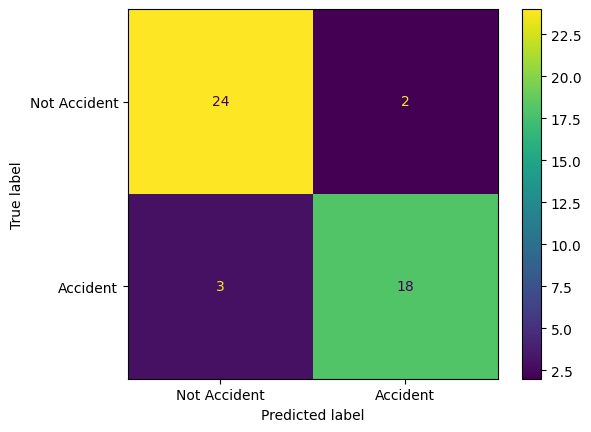

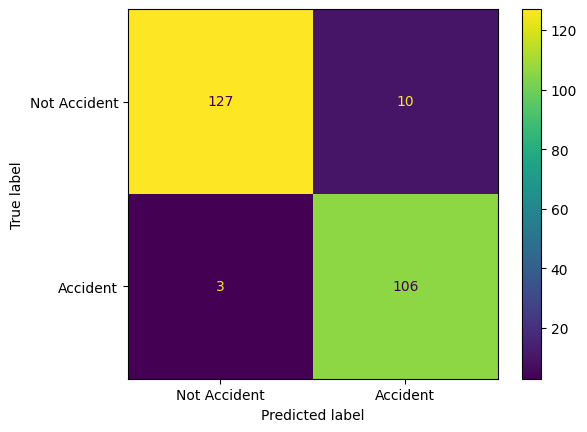

<Figure size 640x480 with 0 Axes>

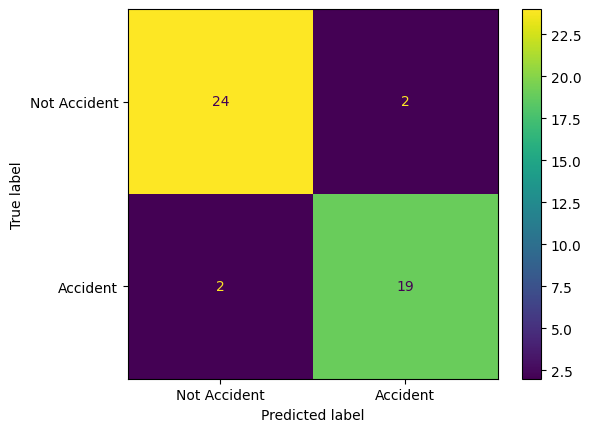

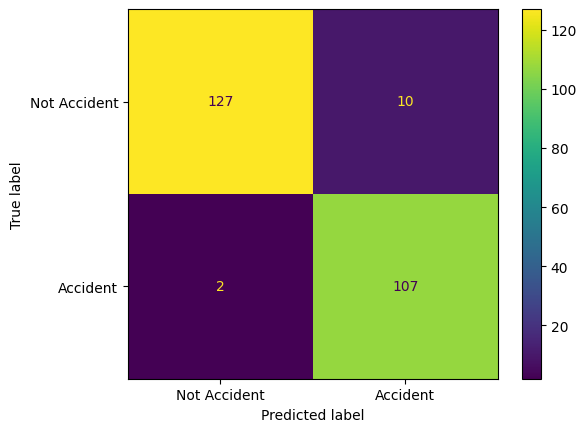

<Figure size 640x480 with 0 Axes>

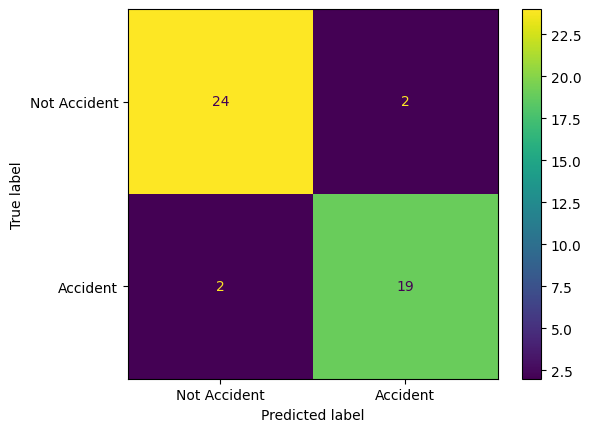

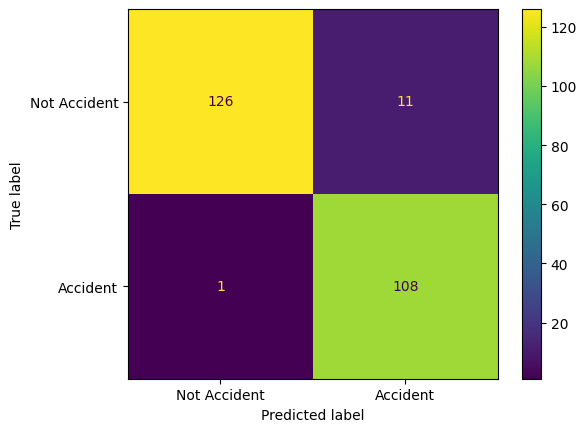

<Figure size 640x480 with 0 Axes>

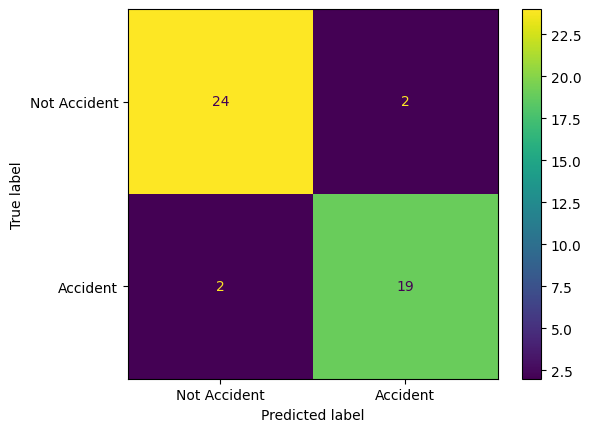

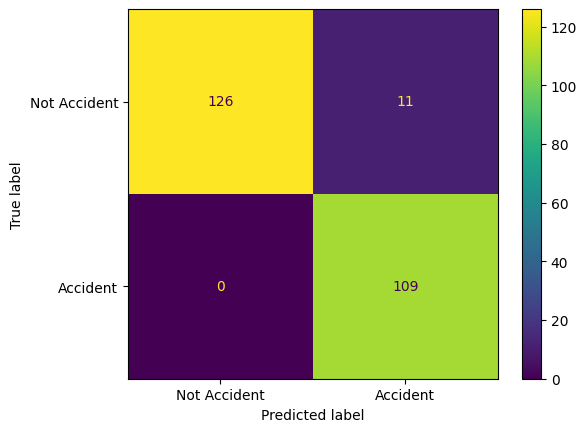

<Figure size 640x480 with 0 Axes>

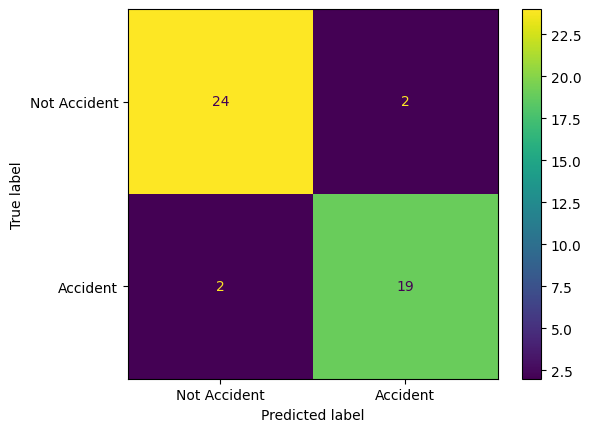

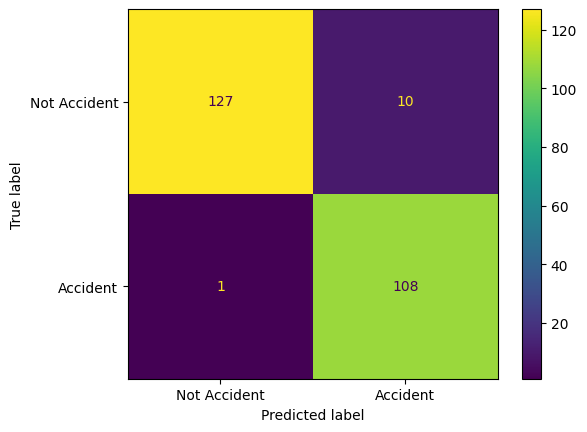

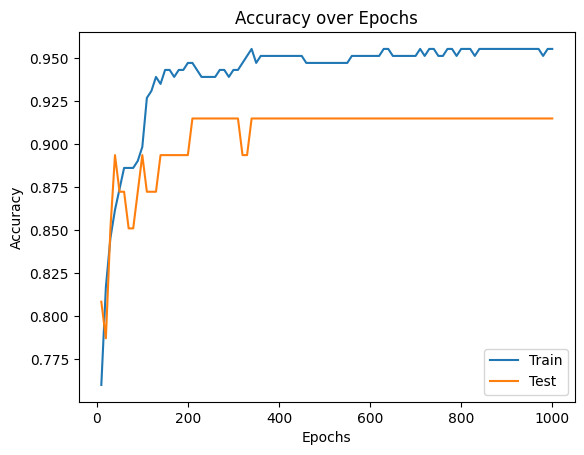

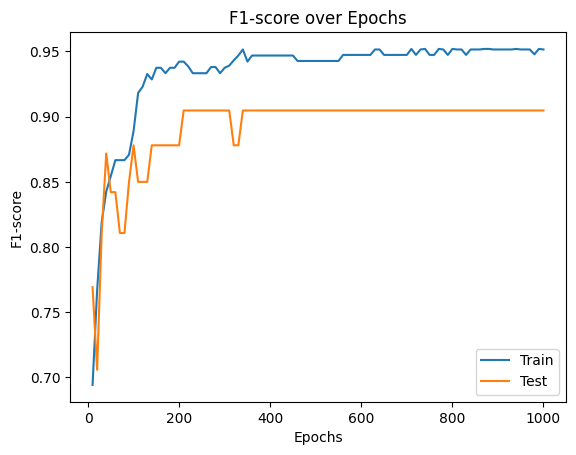

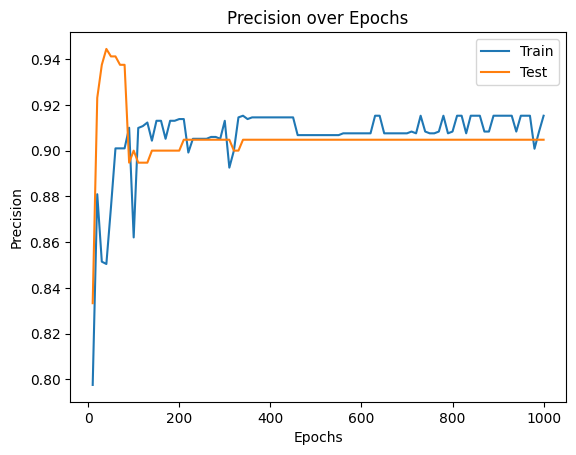

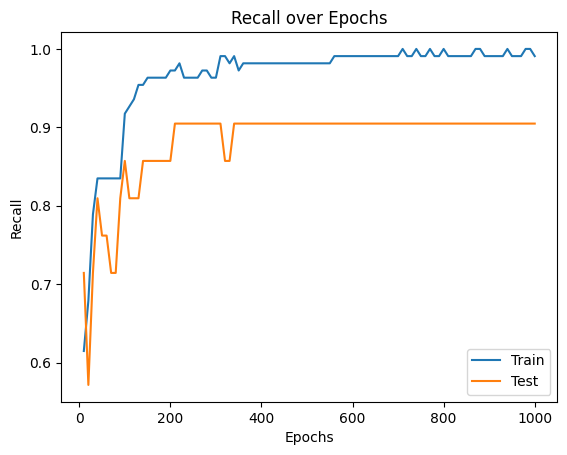

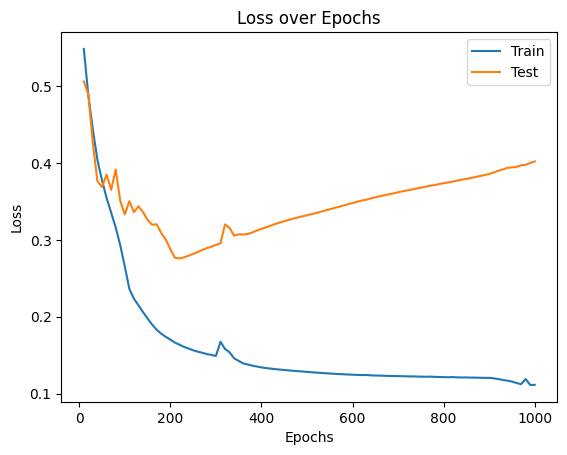

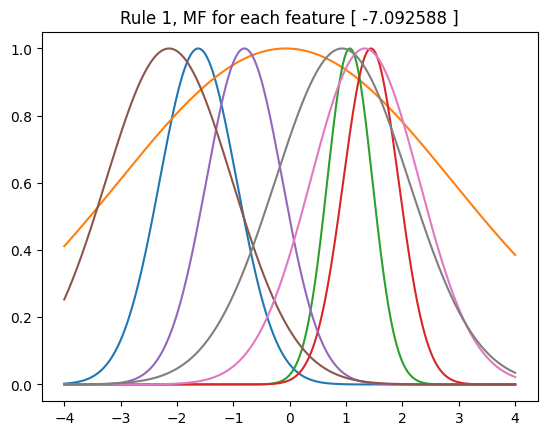

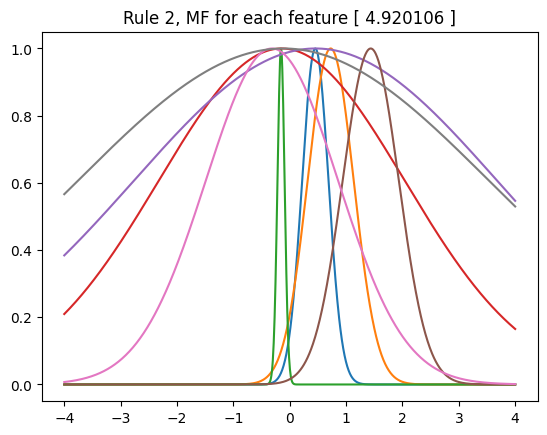

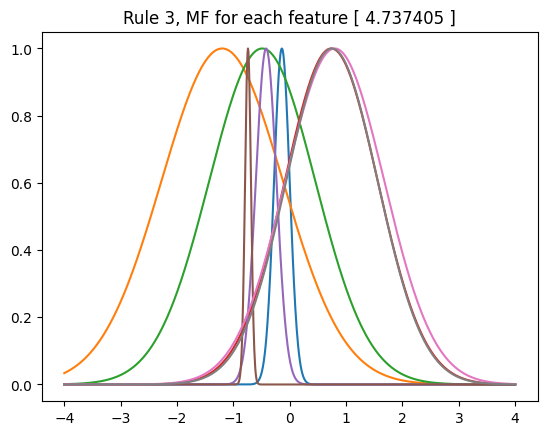

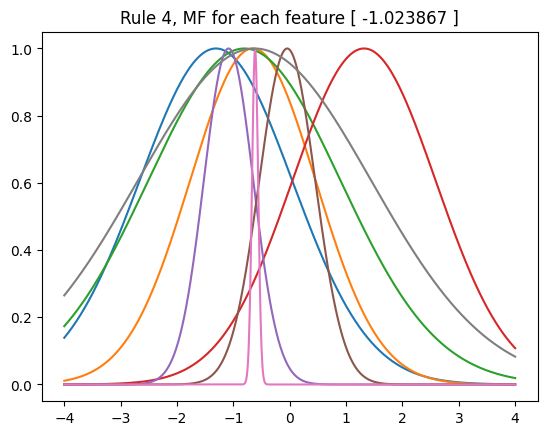

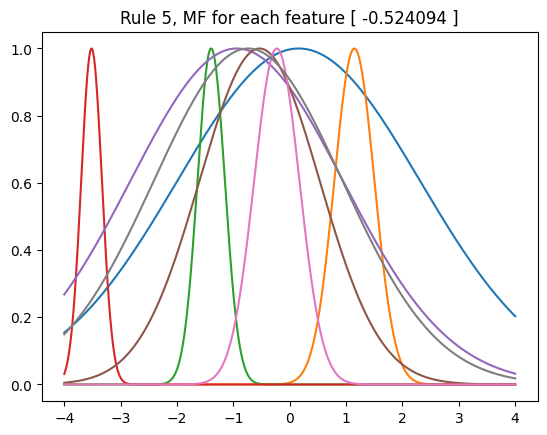

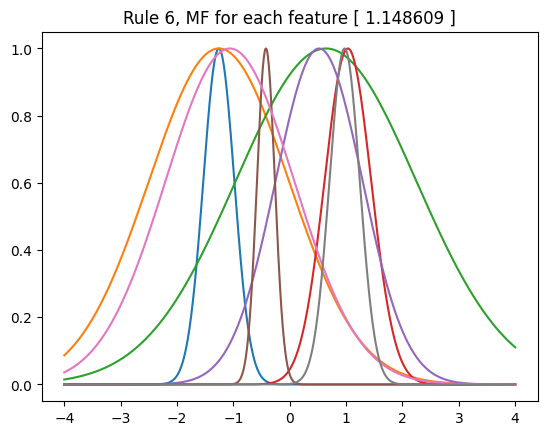

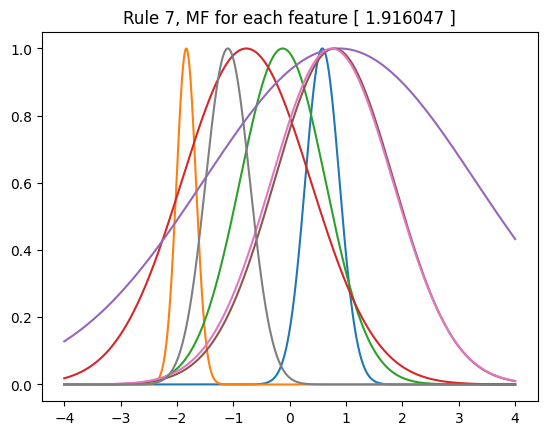

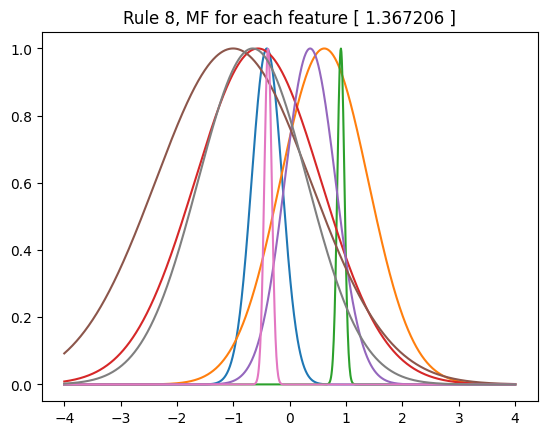

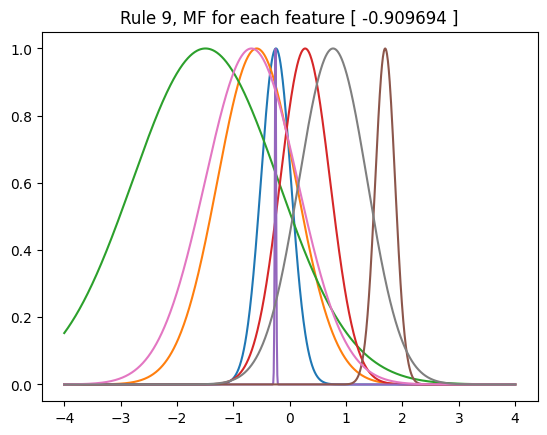

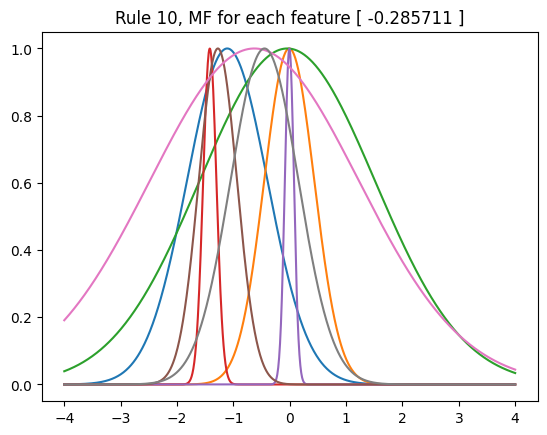

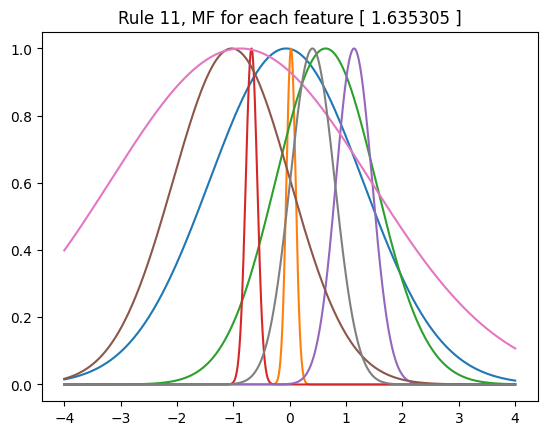

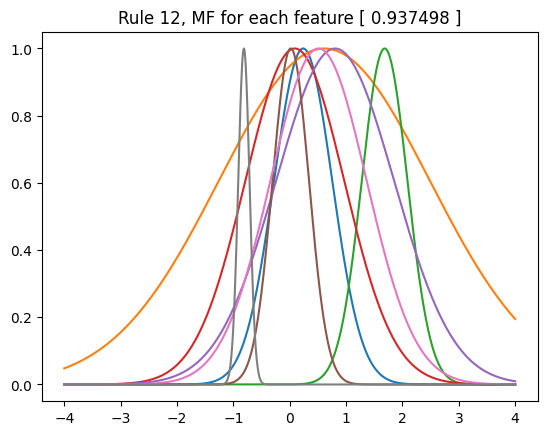

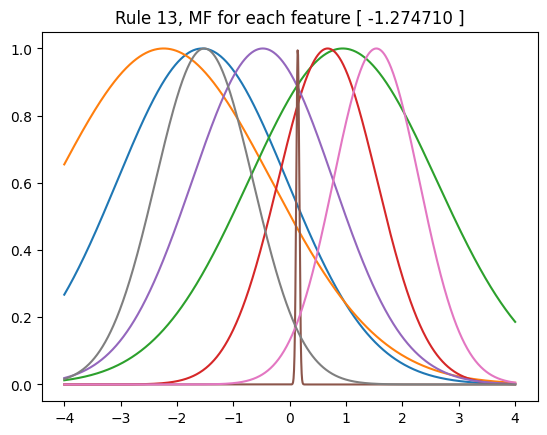

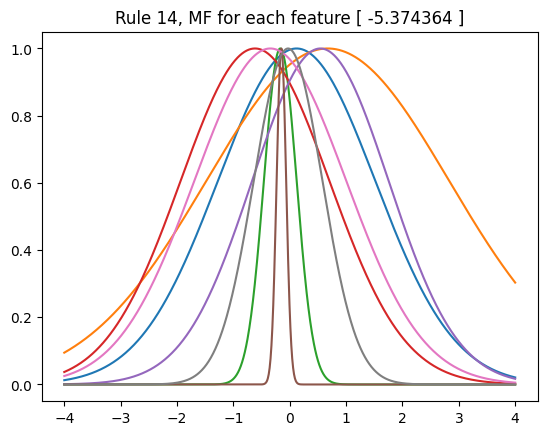

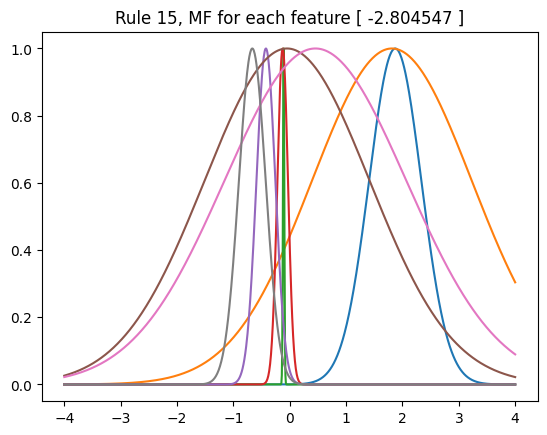

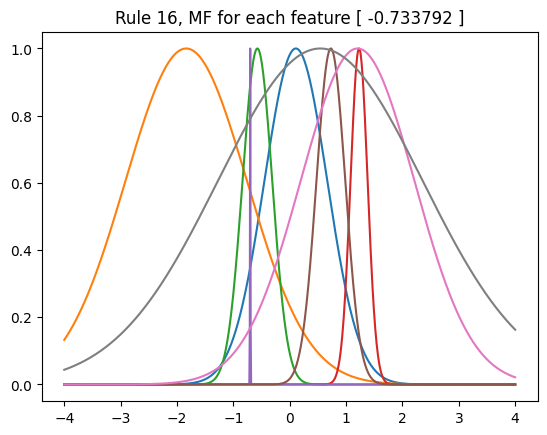

In [ ]:
x_axis = []
tr_loss, te_loss = [],[]
tr_acc, te_acc = [], []
tr_f1, te_f1 = [], []
tr_prec, te_prec = [], []
tr_rec, te_rec = [], []
init=tf.global_variables_initializer()
with tf.Session() as sess:
	sess.run(init)

	for e in range(epochs):
		Y_train, loss_tr, _ = sess.run([Y_train_t, loss, optimizer], feed_dict={X_train_t: X_train, y_train_t: y_train})
		Y_test, loss_te    = sess.run([Y_test_t, loss_test], feed_dict={X_test_t: X_test, y_test_t: y_test})

		if (e+1) % 10 == 0:
			x_axis.append(e+1)

			tr_loss.append(loss_tr)
			te_loss.append(loss_te)

			Y_train = np.where(Y_train > 0, 1, 0)
			Y_test = np.where(Y_test > 0, 1, 0)

			acc_tr = accuracy_score(y_train,Y_train)
			acc_te = accuracy_score(y_test,Y_test)

			f1_tr = f1_score(y_train,Y_train)
			f1_te = f1_score(y_test,Y_test)

			prec_tr = precision_score(y_train,Y_train)
			prec_te = precision_score(y_test,Y_test)

			rec_tr = recall_score(y_train,Y_train)
			rec_te = recall_score(y_test,Y_test)

			tr_acc.append(acc_tr)
			te_acc.append(acc_te)
			tr_f1.append(f1_tr)
			te_f1.append(f1_te)
			tr_prec.append(prec_tr)
			te_prec.append(prec_te)
			tr_rec.append(rec_tr)
			te_rec.append(rec_te)

		if (e+1) % 200 == 0:
			print("Epoch ",e+1,">>>>>>>>>>>>>")
			#print(Y_test) ### debug print
			print("loss      >>>","test:", loss_te,"\t\t train:",loss_tr)
			print("accuracy  >>>","test:", acc_te,"\t train:",acc_tr)
			print("f1-score  >>>","test:", f1_te,"\t train:",f1_tr)
			print("precision >>>","test:", prec_te,"\t train:",prec_tr)
			print("recall    >>>","test:", rec_te,"\t train:",rec_tr)
			print()

			cm_test = confusion_matrix(y_test, Y_test)
			cm_train = confusion_matrix(y_train, Y_train)

			plt.figure(int(str(e+1)+'1'))
			disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=["Not Accident","Accident"])
			disp = disp.plot()
			#plt.show()
			plt.savefig(dir_+"/cf_test-epoch"+str(e+1)+".png",transparent=True)

			plt.figure(int(str(e+1)+'2'))
			disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=["Not Accident","Accident"])
			disp = disp.plot()
			#plt.show()
			plt.savefig(dir_+"/cf_train-epoch"+str(e+1)+".png",transparent=True)


	# plot accuracy
	plt.figure(1)
	plt.plot(x_axis,tr_acc,label="Train")
	plt.plot(x_axis,te_acc,label="Test")
	plt.xlabel('Epochs')
	plt.ylabel('Accuracy')
	plt.title('Accuracy over Epochs')
	plt.legend()
	#plt.show()
	plt.savefig(dir_+"/acc.png",transparent=True)

	plt.figure(2)
	plt.plot(x_axis,tr_f1,label="Train")
	plt.plot(x_axis,te_f1,label="Test")
	plt.xlabel('Epochs')
	plt.ylabel('F1-score')
	plt.title('F1-score over Epochs')
	plt.legend()
	#plt.show()
	plt.savefig(dir_+"/f1.png",transparent=True)

	plt.figure(3)
	plt.plot(x_axis,tr_prec,label="Train")
	plt.plot(x_axis,te_prec,label="Test")
	plt.xlabel('Epochs')
	plt.ylabel('Precision')
	plt.title('Precision over Epochs')
	plt.legend()
	#plt.show()
	plt.savefig(dir_+"/precision.png",transparent=True)

	plt.figure(4)
	plt.plot(x_axis,tr_rec,label="Train")
	plt.plot(x_axis,te_rec,label="Test")
	plt.xlabel('Epochs')
	plt.ylabel('Recall')
	plt.title('Recall over Epochs')
	plt.legend()
	#plt.show()
	plt.savefig(dir_+"/recall.png",transparent=True)

	plt.figure(5)
	plt.plot(x_axis,tr_loss,label="Train")
	plt.plot(x_axis,te_loss,label="Test")
	plt.xlabel('Epochs')
	plt.ylabel('Loss')
	plt.title('Loss over Epochs')
	plt.legend()
	#plt.show()
	plt.savefig(dir_+"/loss.png",transparent=True)

	mu_fin = sess.run(mu)
	mu_fin = np.reshape(mu_fin, (m, n))
	sigma_fin = sess.run(sigma)
	sigma_fin = np.reshape(sigma_fin, (m,n))
	w_fin = sess.run(w)
	x_axis_mf = np.linspace(-4, 4, 1000)
	for r in range(m):
		plt.figure(r+6)
		plt.title("Rule %d, MF for each feature [ %f ]" % ((r + 1), w_fin[0, r]))
		for i in range(n):
			plt.plot(x_axis_mf, np.exp(-0.5 * ((x_axis_mf - mu_fin[r, i]) ** 2) / (sigma_fin[r, i] ** 2)))
		#plt.show()
		plt.savefig(dir_+"/rule-"+str(r+1)+".png",transparent=True)